In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Dataset Overview

In [2]:
# Loading and Exploring the Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


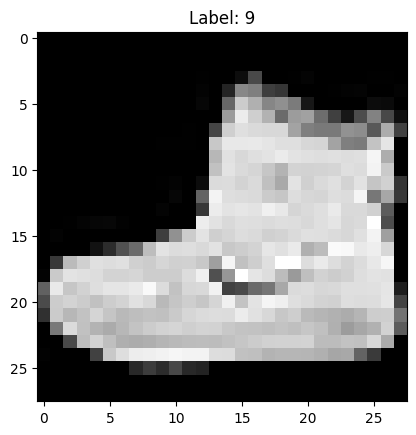

In [3]:
# Display the first image in the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Data Preprocessing


In [4]:
# Reshaping data to fit the model (add a channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


Data Preprocessing...


In [15]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
# Normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Building the CNN Model


In [21]:
from keras import layers, models

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [22]:
# Compiling the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Compiling the model...


In [23]:
# Training the Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

Training the model...
Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.8716 - accuracy: 0.6999 - val_loss: 0.5941 - val_accuracy: 0.7827
Epoch 2/10
300/300 [==============================] - 5s 16ms/step - loss: 0.5474 - accuracy: 0.8003 - val_loss: 0.5224 - val_accuracy: 0.8067
Epoch 3/10
300/300 [==============================] - 7s 22ms/step - loss: 0.4851 - accuracy: 0.8231 - val_loss: 0.4765 - val_accuracy: 0.8261
Epoch 4/10
300/300 [==============================] - 6s 20ms/step - loss: 0.4489 - accuracy: 0.8361 - val_loss: 0.4697 - val_accuracy: 0.8296
Epoch 5/10
300/300 [==============================] - 7s 22ms/step - loss: 0.4217 - accuracy: 0.8454 - val_loss: 0.4408 - val_accuracy: 0.8379
Epoch 6/10
300/300 [==============================] - 7s 23ms/step - loss: 0.4021 - accuracy: 0.8532 - val_loss: 0.4283 - val_accuracy: 0.8465
Epoch 7/10
300/300 [==============================] - 6s 21ms/step - loss: 0.3852 - accuracy: 0.8576 - val_loss: 0.4247 

In [24]:
# Evaluating the Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Evaluating the model...
313/313 [==============================] - 2s 7ms/step - loss: 0.3873 - accuracy: 0.8606
Test Loss: 0.3872990310192108
Test Accuracy: 0.8605999946594238


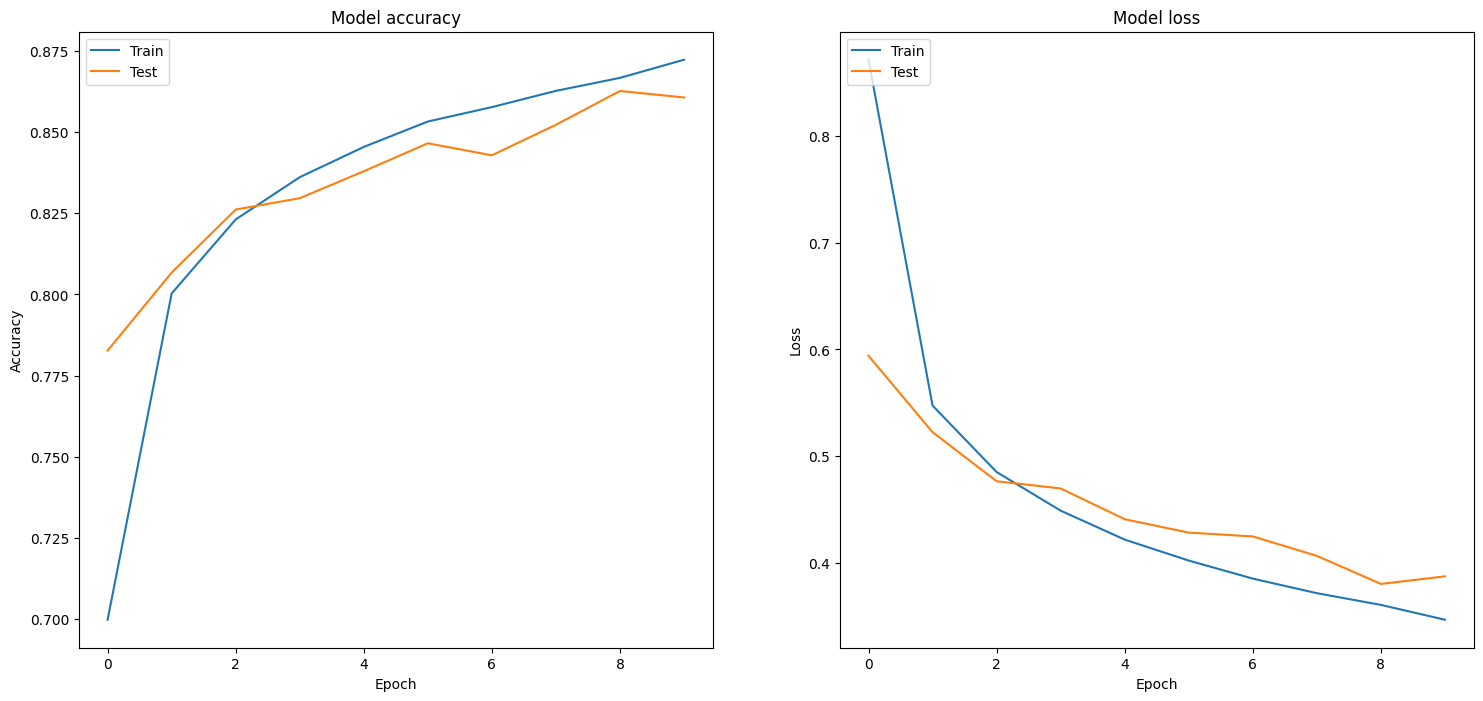

In [35]:
# Plotting training & validation accuracy values
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plotting training & validation loss values

In [27]:
# Making Predictions
predictions = model.predict(x_test)

Making predictions on the test data...
313/313 [==============================] - 2s 5ms/step


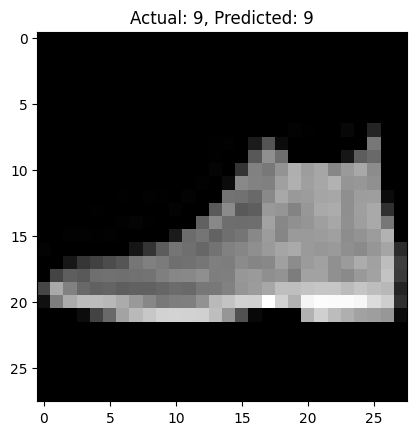

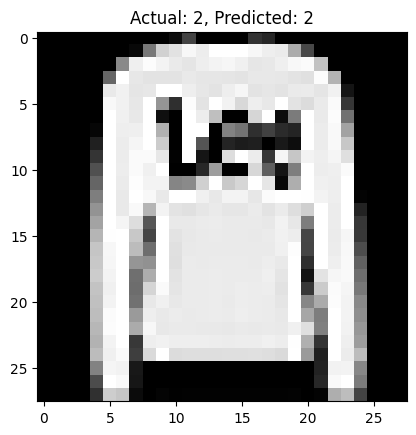

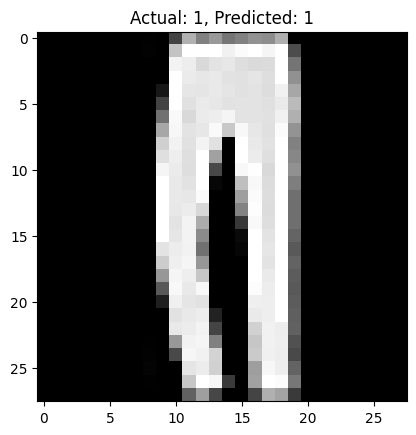

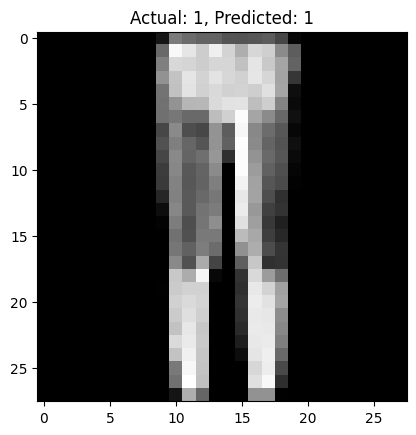

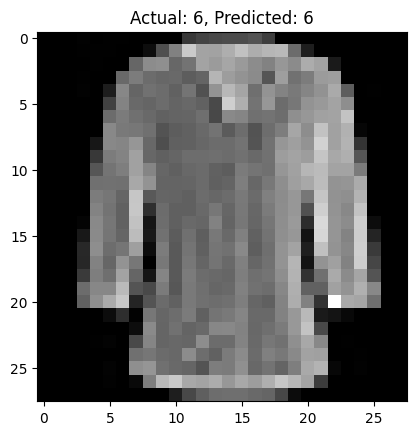

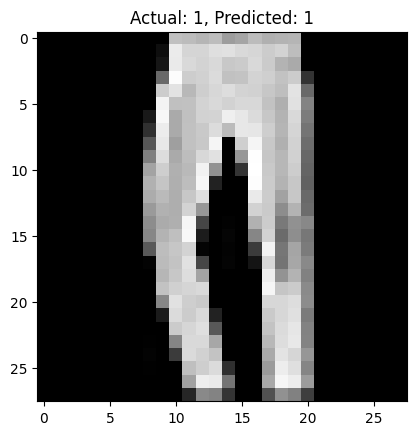

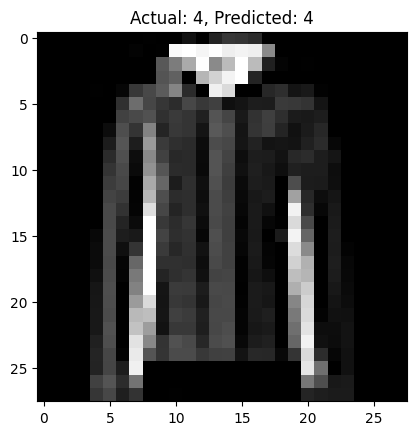

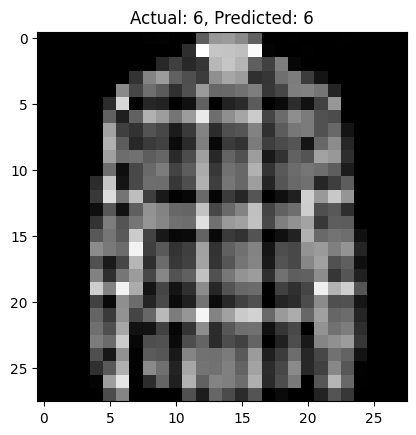

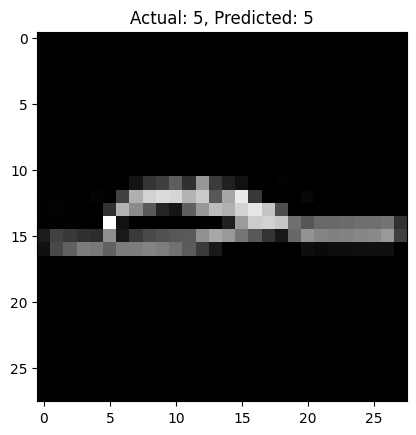

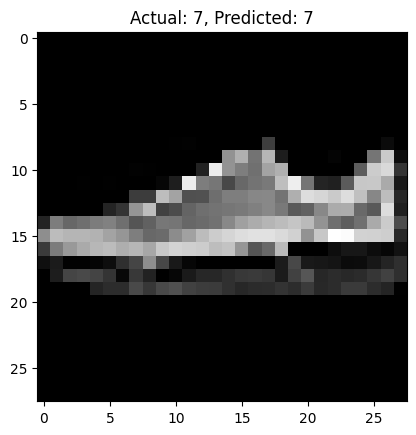

In [29]:
# Display the first 5 predictions
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}")
    plt.show()